# Prop 10: The One About Rent Control

<img src="friends_apt.jpg">

# What does it do?


- Repeals a 23-year old law, **Costa-Hawkins**, strictly limiting the use of rent control in California. 


- **Costa-Hawkins** prohibits rent control on single family homes, on condominiums, and new rental units built after the law was passed in 1995.

    + Some cities already had rent control laws and it affects them differently. In San Francisco only construction older than 1979 can be rent controlled, and older than 1980 in Oakland and Berkeley, the years those cities passed their rent control laws. In the City of Los Angeles it's 1978. 
    + Only 15 California cities have rent control regulations on the books
    + More than a dozen cities in California have some form of rent control, including Alameda, Berkeley, Beverly Hills, East Palo Alto, Hayward, Los Angeles, Los Gatos, Mountain View, Oakland, Palm Springs, Richmond, San Francisco, San Jose, Santa Monica and West Hollywood.  <!--http://www.capradio.org/articles/2018/06/20/rent-control-is-coming-to-californias-november-ballot-heres-whats-at-stake/-->

- A yes vote on Prop 10 **DOES NOT create new rent control lows**. It **ALLOWS cities and counties to write their own**.

    + Rent control laws can limit rent increases for existing tenants, implement vacancy controls to limit rent increases when a tenants move out, and provide tenant protections against eviction.
    + Rent-control policies may not violate landlords’ right to a fair financial return on their rental property, i.e., rent control is not a rent freeze. For example, in Los Angeles, rent-controlled apartments face increases of 3 to 8 percent annually. It's tied to the Consumer Price Index; this year it’s 3 percent.

sources:    
http://www.braintrustlive.com/blog/2018/10/18/2018-general-election-ca-prop-cheat-sheet
https://en.wikipedia.org/wiki/Costa%E2%80%93Hawkins_Rental_Housing_Act
https://la.curbed.com/2018/6/4/17302800/rent-control-los-angeles-rules-guide
https://ballotpedia.org/California_Proposition_10,_Local_Rent_Control_Initiative_(2018)

# For/Against

- **Supporters** include
    + California Democratic Party
    + Democratic Socialists of America - Los Angeles & Sacremento chapters
    + Mayor of Los Angeles Eric Garcetti
    + Unions AFSCME and SEIU California.

    
- Arguments in favor are that it prevents displacement and homelessness and facilitates local control.

    

- **Opposition** include
    + California Republican Party 
    + California Libertarian Party
    + CA gubernatorial candidates Lt. Gov. Gavin Newsom (D) and John Cox (R).
    + California Chamber of Commerce

    
- Arguments against are that it would deter new construction and "the only way to solve the housing crisis is to build more".


# Spending
<img src="prop10spending.png">

<img src="forcash.png">

<img src="oppositioncash.png">

# Visualization of rental prices by age of unit
 - Compare 70s vs. 80s to 80s vs. 90s since most rent control laws affect pre-1980 property
 - Many limitations: Most of CA isn't rent-controlled and decade-to-decade differences are counfounded with changes in housing stock being built. 
     + No way to control for that in Census data or shrink to city or census block level.
 - Chance to experiment with Bokeh and censusdata package in Python 
 

# I. Setup
## First install some packages

`python3.7 -m pip install censusdata`    
`python3.7 -m pip install hide_code`    
`python3.7 -m pip install bokeh`    
`python3.7 -m pip install cython`
`python3.7 -m pip install git+https://github.com/jswhit/pyproj.git`
`python3.7 -m pip install geopandas`  


In [978]:
import censusdata as cd
import pandas as pd
import imp
import numpy as np

print(imp.find_module('censusdata'))
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

(None, '/usr/local/lib/python3.7/site-packages/censusdata', ('', '', 5))


## Find yolo county

In [1160]:
#found yolo
tmp = cd.geographies(cd.censusgeo([('state', '06'), ('county', '*')]), 'acs5', 2015)
print(list(tmp.keys())[1])
tmp['Yolo County, California']

Alpine County, California


censusgeo((('state', '06'), ('county', '113')))

# II. Get data

## Can I get median rent by year house built at the county level?

I can find the right table using the censusdata search function

In [1161]:
#cd.search('acs5', 2015, 'concept', 'RENT BY YEAR STRUCTURE')
cd.search('acs5', 2015, 'label', '\ [R|r]ent\ ')
cd.censustable('acs1', 2015, 'B25111')
# possible of future interest: table B25113, Median Gross Rent by Year Householder Moved Into Unit

OrderedDict([('B25111_001E',
              {'label': 'Median gross rent --!!Total:',
               'concept': 'B25111. Median Gross Rent by Year Structure Built',
               'predicateType': 'int'}),
             ('B25111_001M',
              {'label': 'Margin of Error for!!Median gross rent --!!Total:',
               'concept': 'B25111. Median Gross Rent by Year Structure Built',
               'predicateType': 'int'}),
             ('B25111_002E',
              {'label': 'Median gross rent --!! Built 2014 or later',
               'concept': 'B25111. Median Gross Rent by Year Structure Built',
               'predicateType': 'int'}),
             ('B25111_002M',
              {'label': 'Margin of Error for!!Median gross rent --!! Built 2014 or later',
               'concept': 'B25111. Median Gross Rent by Year Structure Built',
               'predicateType': 'int'}),
             ('B25111_003E',
              {'label': 'Median gross rent --!!Built 2010 to 2013',
             

## No, have to go to decade built and get geography at the PUMA level 
PUMAs are census geographics that nest within states or equivalent entities and contain at least 100,000 people

Identifiability is always a concern with census data

In [1162]:
ca_df = cd.download('acs5', 2016, cd.censusgeo([('state', '06'), ('public use microdata area', "*")]), ['B25111_007E']) #1960 - 1969
ca_df.columns = ['1960-1969']

ca_df['1970-1979'] = cd.download('acs5', 2016, cd.censusgeo([('state', '06'), ('public use microdata area', "*")]), ['B25111_006E'])
ca_df['1980-1989'] = cd.download('acs5', 2016, cd.censusgeo([('state', '06'), ('public use microdata area', "*")]), ['B25111_005E'])
ca_df['1990-1999'] = cd.download('acs5', 2016, cd.censusgeo([('state', '06'), ('public use microdata area', "*")]), ['B25111_004E'])
ca_df['2000-2009'] = cd.download('acs5', 2016, cd.censusgeo([('state', '06'), ('public use microdata area', "*")]), ['B25111_003E'])
ca_df['2010-    '] = cd.download('acs5', 2016, cd.censusgeo([('state', '06'), ('public use microdata area', "*")]), ['B25111_002E'])

# III. Visualize


In [1163]:
import geopandas
import bokeh
from bokeh.plotting import figure, save
from bokeh.sampledata.us_states import data as states
from bokeh.io import show

## Get PUMA shape files

source: https://www.census.gov/geo/maps-data/data/cbf/cbf_puma.html

Follow plotting guides here: https://automating-gis-processes.github.io/2016/Lesson5-interactive-map-bokeh.html
and: http://bokeh.pydata.org/en/latest/docs/gallery/texas.html#gallery-texas

In [1186]:
# File path
ca_pumas_fp = r"/Users/janecarlen/Documents/DSI/proposition_fest/cb_2016_06_puma10_500k/cb_2016_06_puma10_500k.shp"
ca_poly = geopandas.read_file(ca_pumas_fp)

# Get state too
# https://data.ca.gov/dataset/ca-geographic-boundaries
ca_state_fp = r"/Users/janecarlen/Documents/DSI/proposition_fest/CA_State/CA_State_TIGER2016.shp"
ca_state_poly = geopandas.read_file(ca_state_fp)

In [1187]:
## Basic plot with matplotlib
## import matplotlib
## tmp = ca_poly.plot(cmap='Set2', figsize = (10,10))

## Prepare for bokeh

In [1188]:
# https://automating-gis-processes.github.io/2016/Lesson5-interactive-map-bokeh.html
def getPolyCoords_convex(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""
    exterior = row[geom].convex_hull.exterior #had to add convex hull for non-continguous cases
    if coord_type == 'x':
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        return list( exterior.coords.xy[1] )

#error when boundary is not contiguous    
ca_poly['x'] = ca_poly.apply(getPolyCoords_convex, geom='geometry', coord_type='x', axis=1)
ca_poly['y'] = ca_poly.apply(getPolyCoords_convex, geom='geometry', coord_type='y', axis=1)

In [1189]:
#https://automating-gis-processes.github.io/2017/lessons/L5/advanced-bokeh.html

def getXYCoords(geometry, coord_type):
    """ Returns either x or y coordinates from  geometry coordinate sequence. Used with LineString and Polygon geometries."""
    if coord_type == 'x':
        return geometry.coords.xy[0]
    elif coord_type == 'y':
        return geometry.coords.xy[1]

def getPolyCoords(geometry, coord_type):
    """ Returns Coordinates of Polygon using the Exterior of the Polygon."""
    ext = geometry.exterior
    return getXYCoords(ext, coord_type)

def getLineCoords(geometry, coord_type):
    """ Returns Coordinates of Linestring object."""
    return getXYCoords(geometry, coord_type)

def getPointCoords(geometry, coord_type):
    """ Returns Coordinates of Point object."""
    if coord_type == 'x':
        return geometry.x
    elif coord_type == 'y':
        return geometry.y

def multiGeomHandler(multi_geometry, coord_type, geom_type):
    """
    Function for handling multi-geometries. Can be MultiPoint, MultiLineString or MultiPolygon.
    Returns a list of coordinates where all parts of Multi-geometries are merged into a single list.
    Individual geometries are separated with np.nan which is how Bokeh wants them.
    # Bokeh documentation regarding the Multi-geometry issues can be found here (it is an open issue)
    # https://github.com/bokeh/bokeh/issues/2321
    """

    for i, part in enumerate(multi_geometry):
        # On the first part of the Multi-geometry initialize the coord_array (np.array)
        if i == 0:
            if geom_type == "MultiPoint":
                coord_arrays = np.append(getPointCoords(part, coord_type), np.nan)
            elif geom_type == "MultiLineString":
                coord_arrays = np.append(getLineCoords(part, coord_type), np.nan)
            elif geom_type == "MultiPolygon":
                coord_arrays = np.append(getPolyCoords(part, coord_type), np.nan)
        else:
            if geom_type == "MultiPoint":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPointCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiLineString":
                coord_arrays = np.concatenate([coord_arrays, np.append(getLineCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiPolygon":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPolyCoords(part, coord_type), np.nan)])

    # Return the coordinates
    return coord_arrays


def getCoords(row, geom_col, coord_type):
    """
    Returns coordinates ('x' or 'y') of a geometry (Point, LineString or Polygon) as a list (if geometry is LineString or Polygon).
    Can handle also MultiGeometries.
    """
    # Get geometry
    geom = row[geom_col]

    # Check the geometry type
    gtype = geom.geom_type

    # "Normal" geometries
    # -------------------

    if gtype == "Point":
        return getPointCoords(geom, coord_type)
    elif gtype == "LineString":
        return list( getLineCoords(geom, coord_type) )
    elif gtype == "Polygon":
        return list( getPolyCoords(geom, coord_type) )

In [1190]:
ca_poly['x'] = ca_poly.apply(getCoords, geom_col = 'geometry', coord_type = 'x', axis = 1)
ca_poly['y'] = ca_poly.apply(getCoords, geom_col = 'geometry', coord_type = 'y', axis = 1)
ca_poly.head(2)
ca_poly.fillna(value=pd.np.nan, inplace=True)
ca_poly.head(2)

,STATEFP10,PUMACE10,AFFGEOID10,GEOID10,NAME10,LSAD10,ALAND10,AWATER10,geometry,x,y
0,06,01907,7950000US0601907,0601907,"Fresno County (East)--Sanger, Reedley & Parlie...",P0,7647644973,117294872,"POLYGON ((-119.745652 36.938998, -119.743741 3...","[-119.745652, -119.743741, -119.742119, -119.7...","[36.938998, 36.941095, 36.943537, 36.944345, 3..."
1,06,00702,7950000US0600702,0600702,Butte County (Southeast)--Oroville City & Para...,P0,2918880948,94035819,"POLYGON ((-121.908697 39.30799, -121.907403 39...","[-121.908697, -121.907403, -121.907227, -121.9...","[39.30799, 39.313092999999995, 39.315199, 39.3..."


In [1213]:
#make state outline
#ca_state_poly['x'] = [ca_state_poly['geometry'][0].convex_hull.exterior.coords.xy[0]]
#ca_state_poly['y'] = [ca_state_poly['geometry'][0].convex_hull.exterior.coords.xy[1]]
#ca_state_poly


In [1170]:
ca_puma_data = dict(
    sixties = ca_df['1960-1969'].values,
    seventies = ca_df['1970-1979'].values,
    eighties = ca_df['1980-1989'].values,
    nineties = ca_df['1990-1999'].values,
    aughts = ca_df['2000-2009'].values,
    tens = ca_df['2010-    '].values,
    x = ca_poly['x'],
    y = ca_poly['y'],
    #median
)

ca_puma_df = pd.DataFrame(ca_puma_data)
ca_puma_df.dropna(inplace=True)
ca_puma_df.shape
ca_puma_data2 = pd.DataFrame.to_dict(ca_puma_df, orient='list')


In [1171]:
ca_puma_data2['built_90s_over_80s'] = np.divide(ca_puma_data2['nineties'], ca_puma_data2['eighties'])
ca_puma_data2['built_80s_over_70s'] = np.divide(ca_puma_data2['eighties'], ca_puma_data2['seventies'])
ca_puma_data2['built_70s_over_60s'] = np.divide(ca_puma_data2['seventies'], ca_puma_data2['sixties'])

#ca_puma_data2['90_to_80s'] = ca_puma_data2['nineties']/ca_puma_data2['nineties']

## Distribution of ratios of median rent by PUMA for houses built in the 90s vs. 80, 80s vs. 70s and 70s vs. 60?

(array([ 7.,  9., 62., 85., 54., 21., 10.,  1.,  1.,  4.]),
 array([0.79756227, 0.86464904, 0.93173582, 0.9988226 , 1.06590937,
        1.13299615, 1.20008293, 1.2671697 , 1.33425648, 1.40134326,
        1.46843003]),
 <a list of 10 Patch objects>)

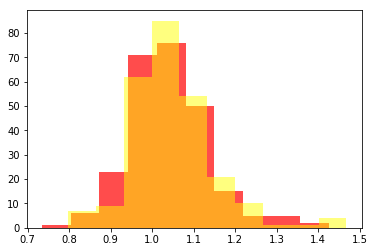

In [1553]:
import matplotlib.pyplot as plt
plt.hist(x=ca_puma_data2['built_80s_over_70s'], color = "red", alpha = .7)
plt.hist(x=ca_puma_data2['built_70s_over_60s'], color = "yellow", alpha = .5)
#plt.hist(x=ca_puma_data2['built_90s_over_80s'], color = "blue", alpha = .5)



In [1588]:
from bokeh.models import LogColorMapper, ColorBar, LogTicker, BasicTicker, FixedTicker, FuncTickFormatter, LinearColorMapper
from bokeh.palettes import RdBu7 as palette

TOOLS = "pan,wheel_zoom,reset,hover,save"

ca_map = figure(title = "Ratio by PUMA of median rent for units built in 80s to units built in 70s", tools = TOOLS,
               tooltips = [],
               plot_width=1000, plot_height=1000)
color_mapper = LinearColorMapper(palette=palette, low=.7, high=1.5) #Dont' forget limits!
ca_map.title.text_font_size = '16pt'

ca_map.patches('x', 'y', source=ca_puma_data2,
               fill_color= {'field': 'built_80s_over_70s', 'transform': color_mapper},
               fill_alpha=0.7, 
               line_color="black", 
               line_width=0.5)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=6, border_line_color=None, location=(0,0))

ca_map.add_layout(color_bar, 'right')

In [1589]:
ca_outline = pd.DataFrame.from_dict(states['CA'])
ca_map.line('lons', 'lats', source=ca_outline, line_color="black")
show(ca_map)

## Add cities

In [1590]:
from bokeh.models import HoverTool, Range1d
from bokeh.palettes import RdGy5 as palette2

color_mapper2 = LinearColorMapper(palette=palette2)
#data source: https://simplemaps.com/data/us-cities.
cities = pd.read_csv('/Users/janecarlen/Documents/DSI/proposition_fest/uscitiesv1.4.csv')
cities = cities[cities['state_id']=='CA']

#color by rent control
tmp = cities['city']   
rc = ["Alameda", "Berkeley", "Beverly Hills", "East Palo Alto", "Hayward", "Los Angeles", "Los Gatos", "Mountain View", "Oakland", "Palm Springs", "Richmond", "San Francisco", "San Jose", "Santa Monica", "West Hollywood"] 
cities['rent_control_l'] = [item in rc for item in tmp]
cities['rent_control'] = ["Rent Control" if item in rc else "No Rent Control" for item in tmp]
pd.crosstab(cities['rent_control'], 1)
cities['plot_size'] = [5 + 8*(item in rc) for item in tmp]

ca_map.circle(y='lat',x='lng', source=cities, alpha=0.7,
             size = {'field': 'plot_size'},
             color = {'field': 'rent_control_l', 'transform': color_mapper2},
             legend='rent_control')

city_hover = HoverTool()

city_hover.tooltips = [("80s to 70s ratio", "@built_80s_over_70s"), ("city name", '@city_ascii')]
ca_map.add_tools(city_hover)
show(ca_map)

In [1587]:
pd.crosstab(cities['rent_control'], 1)

col_0,1
rent_control,
No Rent Control,1610
Rent Control,15
